In [6]:
import nltk
import pandas as pd

from nltk.translate.bleu_score import SmoothingFunction

In [9]:
results_list = ['results_pydriller_14k.csv',
                'results_pydriller_c.csv']

for result in results_list:
  data = pd.read_csv(result, engine='python')
  data.dropna(inplace=True)
  hypotheses = data['Predicted comment']
  references = data['Original Comment']
  list_of_references = references.tolist()
  list_of_hypotheses = hypotheses.tolist()

  sentence_based_references = [reference.split(' ') for reference in list_of_references]
  sentence_based_hypotheses = [hypothesis.split(' ') for hypothesis in list_of_hypotheses]
  print("\nFile name: ", result)

  bleu_score_c = nltk.translate.bleu_score.corpus_bleu(sentence_based_references, sentence_based_hypotheses)
  print("\nBleu Score: ", bleu_score_c)


File name:  results_pydriller_14k.csv


/usr/local/lib/python3.6/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 3-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)



Bleu Score:  0.08041667008873227

File name:  results_pydriller_c.csv

Bleu Score:  0.4854009661723119


/usr/local/lib/python3.6/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


In [10]:
bleu_list = []
for result in results_list:
  data = pd.read_csv(result, engine='python')
  data.dropna(inplace=True)

  hypotheses = data['Predicted comment']
  references = data['Original Comment']

  list_of_references = references.tolist()
  list_of_hypotheses = hypotheses.tolist()

  sentence_based_references = [reference.split(' ') for reference in list_of_references]
  sentence_based_hypotheses = [hypothesis.split(' ') for hypothesis in list_of_hypotheses]
  print("\nFile name: ", result)

  sm_fn = SmoothingFunction().method4
  bleu_score_c = nltk.translate.bleu_score.corpus_bleu(list_of_references, list_of_hypotheses, smoothing_function=sm_fn)
  bleu_list.append(bleu_score_c)
  print("\nCorpus-level Bleu Score: ", bleu_score_c)


File name:  results_pydriller_14k.csv

Corpus-level Bleu Score:  0.2803203635063388

File name:  results_pydriller_c.csv

Corpus-level Bleu Score:  0.2921146970988232


No handles with labels found to put in legend.


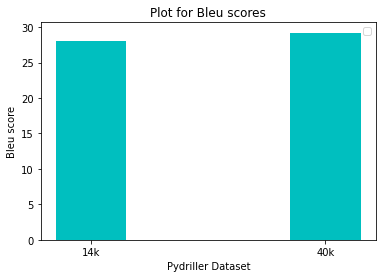

In [11]:
import matplotlib.pyplot as plt

x1 = ['14k', '40k']
y1 = [bleu*100 for bleu in bleu_list]

plt.bar(x1, y1, color='c', align='center', width=0.3)
plt.plot()

plt.xlabel("Pydriller Dataset")
plt.ylabel("Bleu score")
plt.title("Plot for Bleu scores")
plt.legend()
plt.show()

In [12]:
!pip install py-rouge

import rouge
import nltk
nltk.download('punkt')

#reference: https://pypi.org/project/py-rouge/
def prepare_results(p, r, f):
    return '\t{}:\t{}: {:5.2f}\t{}: {:5.2f}\t{}: {:5.2f}'.format(metric, 'P', 100.0 * p, 'R', 100.0 * r, 'F1', 100.0 * f)

print('Evaluation with {}'.format('Avg'))
apply_avg = 'Avg'

evaluator = rouge.Rouge(metrics=['rouge-n', 'rouge-l', 'rouge-w'],
                           max_n=4,
                           limit_length=True,
                           length_limit=300,
                           length_limit_type='words',
                           apply_avg=apply_avg,
                           alpha=0.5, # Default F1_score
                           weight_factor=1.2,
                           stemming=True)

for result in results_list:
    data = pd.read_csv(result, engine='python')
    data.dropna(inplace=True)
    hypotheses = data['Predicted comment']
    references = data['Original Comment']

    all_hypothesis = hypotheses.tolist()
    all_references = references.tolist()

    scores = evaluator.get_scores(all_hypothesis, all_references)

    print("\n\nScores for ", result)
    data_scores = pd.DataFrame.from_dict(scores)
    print(data_scores.head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Evaluation with Avg


Scores for  results_pydriller_14k.csv
    rouge-4   rouge-1   rouge-2   rouge-3   rouge-l   rouge-w
f  0.003798  0.168601  0.032097  0.011369  0.201935  0.090271
p  0.003936  0.167403  0.032124  0.011527  0.200264  0.126696
r  0.003833  0.179730  0.033347  0.011711  0.212232  0.074358


Scores for  results_pydriller_c.csv
    rouge-4   rouge-1   rouge-2   rouge-3   rouge-l   rouge-w
f  0.011216  0.190529  0.064057  0.017750  0.227613  0.117660
p  0.011571  0.225455  0.074109  0.019018  0.258406  0.187340
r  0.012094  0.191118  0.065535  0.018574  0.226967  0.099917
